<a href="https://colab.research.google.com/github/Harshit-Raj-2000/classifying-movie-reviews---binary-classification/blob/main/classifying_movie_reviews(binary_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
import numpy as np

def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [5]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5924 - accuracy: 0.6886 - val_loss: 0.3905 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3265 - accuracy: 0.9061 - val_loss: 0.3357 - val_accuracy: 0.8674
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2439 - accuracy: 0.9257 - val_loss: 0.2858 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1827 - accuracy: 0.9460 - val_loss: 0.2801 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1472 - accuracy: 0.9583 - val_loss: 0.2768 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1275 - accuracy: 0.9614 - val_loss: 0.3035 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1008 - accuracy: 0.9713 - val_loss: 0.3514 - val_accuracy: 0.8686
Epoch 8/20
30

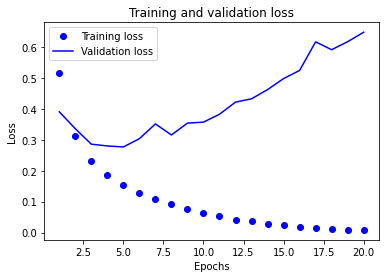

In [8]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo', label ='Training loss')
plt.plot(epochs,val_loss_values,'b',label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

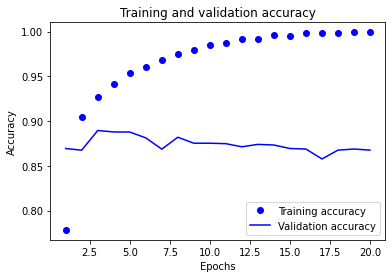

In [9]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label = 'Training accuracy')
plt.plot(epochs,val_acc_values,'b',label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5572 - accuracy: 0.7355
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2815 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2131 - accuracy: 0.9272
Epoch 4/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1689 - accuracy: 0.9435


In [15]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2914 - accuracy: 0.8850


In [16]:
results


[0.2913972735404968, 0.8849999904632568]